# Data synthesis

In this notebook, we generate synthetic data of biological cellular images. 

In [1]:
import os
import sys
import shutil
import matplotlib.image
import numpy as np
from scipy.ndimage import gaussian_filter
from matplotlib import pyplot as plt
import Augmentor
from PIL import Image
import imageio.v2 as imageio  
import pandas as pd
import cv2

from data_synthesis import *

### Parameters

In [2]:
image_size = (512, 512)
density = 0.4
avg_radius = 20
diff_mean = 0.3
sigma_cell = 1
sigma_back = 6
magnitude = 50
grid_size = 4
no_overlap = True

### 1. Create cells mask

Number of cells:  85
Current density:  0.4019966125488281
Unique values in label:  [False  True]


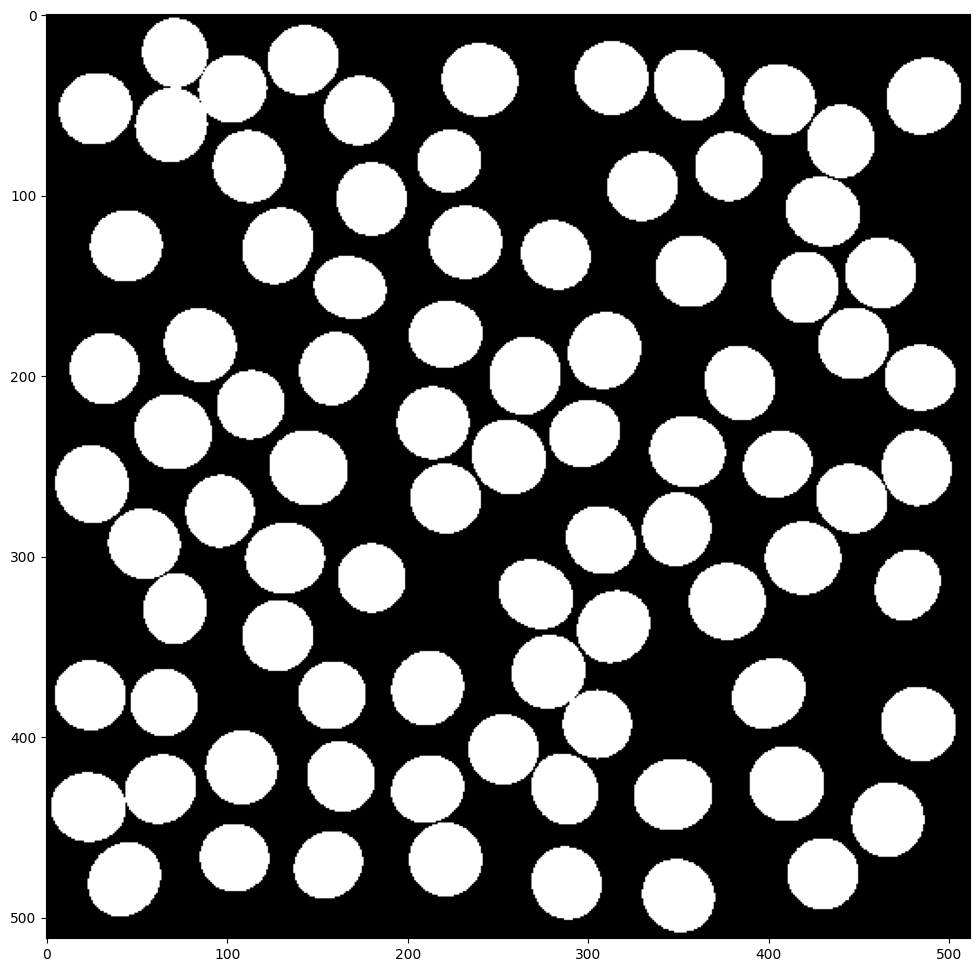

In [3]:
label, num_cells, current_density = generate_label(image_size, avg_radius, no_overlap=no_overlap, density=density)
print('Number of cells: ', num_cells)
print('Current density: ', current_density)
print('Unique values in label: ', np.unique(label))
plt.figure(figsize=(12,12))
plt.imshow(label, cmap='gray', interpolation=None)
plt.show()

### 2. Apply elastic deformation

Initialised with 1 image(s) found.
Output directory set to temp/output.

Processing <PIL.Image.Image image mode=RGBA size=512x512 at 0x1642918E0>: 100%|██████████| 1/1 [00:00<00:00, 11.79 Samples/s]

Unique values in new_label:  [0 1]


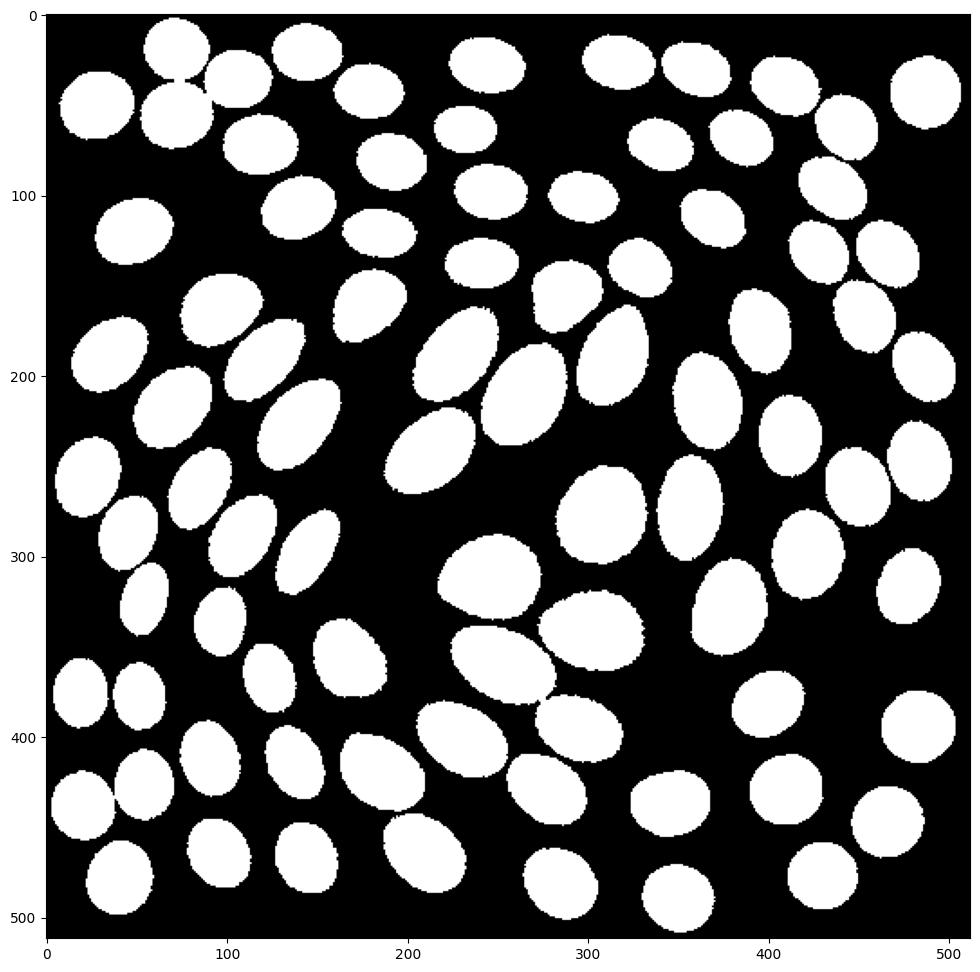

In [4]:
new_label = apply_deformation(label, magnitude, grid_size=3, sigma_blur=0.5)
print('Unique values in new_label: ', np.unique(new_label))
plt.figure(figsize=(12,12))
plt.imshow(new_label, cmap='gray', interpolation=None)
plt.show()

#### Comparing smoothing effects


As shown above, the elastic deformation makes the edges of the cells jagged. To smooth this out, we apply a gaussian filter and threshold at the mean. We explore the effect of various $\sigma$ values for the gaussian filter on the final look of the label mask. 

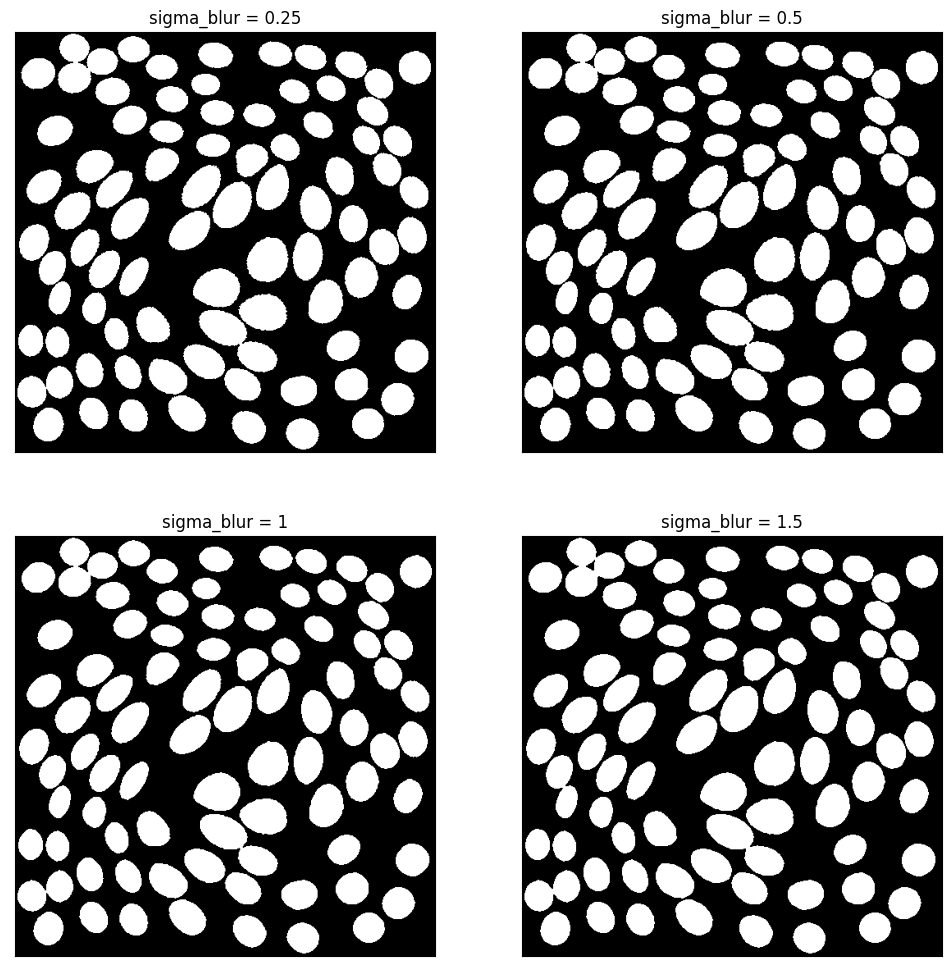

In [5]:
# Smooth label with different sigma_blur values and display in subplots
fig, axs = plt.subplots(2, 2, figsize=(12, 12))
for i, sigma_blur in enumerate([0.25, 0.5, 1, 1.5]):
    idx = i // 2, i % 2
    smooth_label = smooth_binary(new_label, sigma_blur)
    axs[idx].imshow(smooth_label, cmap='gray', interpolation=None)
    axs[idx].set_title('sigma_blur = {}'.format(sigma_blur))
    axs[idx].set_xticks([])
    axs[idx].set_yticks([])
plt.show()

We would like to regain smooth edges while avoiding cells from merging into each other, so we will use the value $\sigma = 0.5$ through our data generation process.


#### Comparing deformation effects 
We now compare the effect of the `magnitude` and `grid_size` parameters on the elastic deformation performed on the images. 

Initialised with 1 image(s) found.
Output directory set to temp/output.

Processing <PIL.Image.Image image mode=RGBA size=512x512 at 0x164944640>: 100%|██████████| 1/1 [00:00<00:00, 12.94 Samples/s]


Initialised with 1 image(s) found.
Output directory set to temp/output.

Processing <PIL.Image.Image image mode=RGBA size=512x512 at 0x164AAAA00>: 100%|██████████| 1/1 [00:00<00:00, 11.37 Samples/s]


Initialised with 1 image(s) found.
Output directory set to temp/output.

Processing <PIL.Image.Image image mode=RGBA size=512x512 at 0x164ACD640>: 100%|██████████| 1/1 [00:00<00:00, 13.47 Samples/s]


Initialised with 1 image(s) found.
Output directory set to temp/output.

Processing <PIL.Image.Image image mode=RGBA size=512x512 at 0x164AEC340>: 100%|██████████| 1/1 [00:00<00:00, 13.62 Samples/s]


Initialised with 1 image(s) found.
Output directory set to temp/output.

Processing <PIL.Image.Image image mode=RGBA size=512x512 at 0x164ABA340>: 100%|██████████| 1/1 [00:00<00:00,  9.74 Samples/s]


Initialised with 1 image(s) found.
Output directory set to temp/output.

Processing <PIL.Image.Image image mode=RGBA size=512x512 at 0x164AF74C0>: 100%|██████████| 1/1 [00:00<00:00,  8.84 Samples/s]


Initialised with 1 image(s) found.
Output directory set to temp/output.

Processing <PIL.Image.Image image mode=RGBA size=512x512 at 0x164AC4040>: 100%|██████████| 1/1 [00:00<00:00,  8.70 Samples/s]


Initialised with 1 image(s) found.
Output directory set to temp/output.

Processing <PIL.Image.Image image mode=RGBA size=512x512 at 0x164AAA8B0>: 100%|██████████| 1/1 [00:00<00:00,  8.73 Samples/s]


Initialised with 1 image(s) found.
Output directory set to temp/output.

Processing <PIL.Image.Image image mode=RGBA size=512x512 at 0x164B27220>: 100%|██████████| 1/1 [00:00<00:00,  9.47 Samples/s]


Initialised with 1 image(s) found.
Output directory set to temp/output.

Processing <PIL.Image.Image image mode=RGBA size=512x512 at 0x164B27E50>: 100%|██████████| 1/1 [00:00<00:00,  9.86 Samples/s]


Initialised with 1 image(s) found.
Output directory set to temp/output.

Processing <PIL.Image.Image image mode=RGBA size=512x512 at 0x164AE01C0>: 100%|██████████| 1/1 [00:00<00:00,  9.37 Samples/s]


Initialised with 1 image(s) found.
Output directory set to temp/output.

Processing <PIL.Image.Image image mode=RGBA size=512x512 at 0x164B27040>: 100%|██████████| 1/1 [00:00<00:00,  9.57 Samples/s]


Initialised with 1 image(s) found.
Output directory set to temp/output.

Processing <PIL.Image.Image image mode=RGBA size=512x512 at 0x164B35BE0>: 100%|██████████| 1/1 [00:00<00:00,  8.23 Samples/s]


Initialised with 1 image(s) found.
Output directory set to temp/output.

Processing <PIL.Image.Image image mode=RGBA size=512x512 at 0x164ACD310>: 100%|██████████| 1/1 [00:00<00:00,  7.18 Samples/s]


Initialised with 1 image(s) found.
Output directory set to temp/output.

Processing <PIL.Image.Image image mode=RGBA size=512x512 at 0x164B35340>: 100%|██████████| 1/1 [00:00<00:00,  8.65 Samples/s]


Initialised with 1 image(s) found.
Output directory set to temp/output.

Processing <PIL.Image.Image image mode=RGBA size=512x512 at 0x164B37850>: 100%|██████████| 1/1 [00:00<00:00,  8.09 Samples/s]


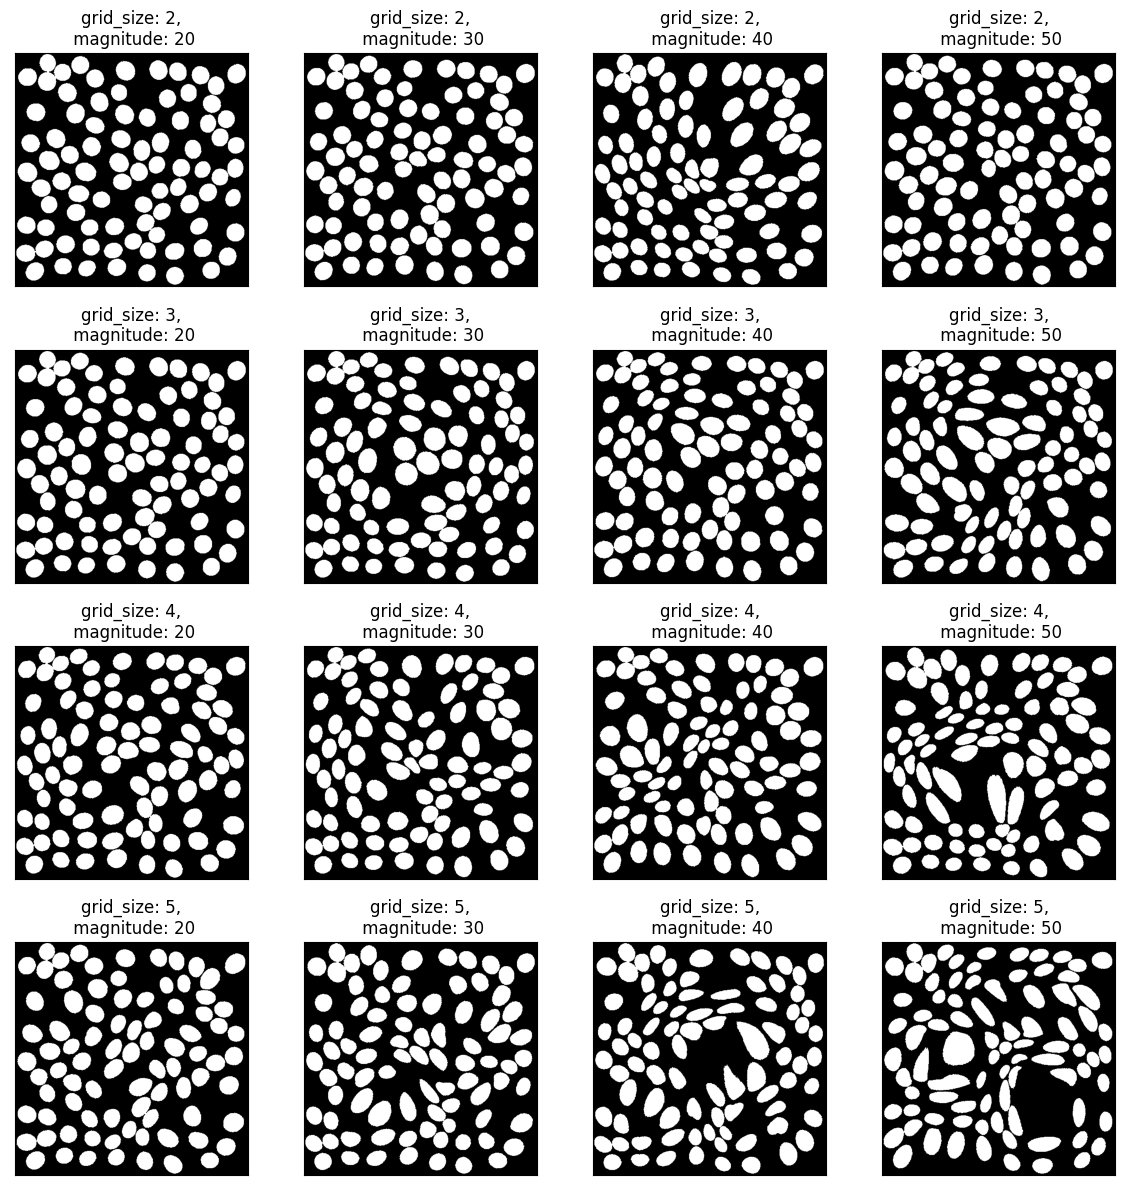

In [6]:
fig, axs = plt.subplots(4, 4, figsize=(12, 12))
for i, grid_size in enumerate([2,3,4,5]):
    for j, magnitude in enumerate([20, 30, 40, 50]):
        deformed_label = apply_deformation(label, magnitude, grid_size)
        axs[i, j].imshow(deformed_label, cmap='gray', interpolation=None)
        axs[i, j].set_title('grid_size: {},\n magnitude: {}'.format(grid_size, magnitude))
        axs[i, j].set_xticks([])
        axs[i, j].set_yticks([])
        # Add padding between subplots
        fig.tight_layout()

plt.show()

### 3. Add noise textures

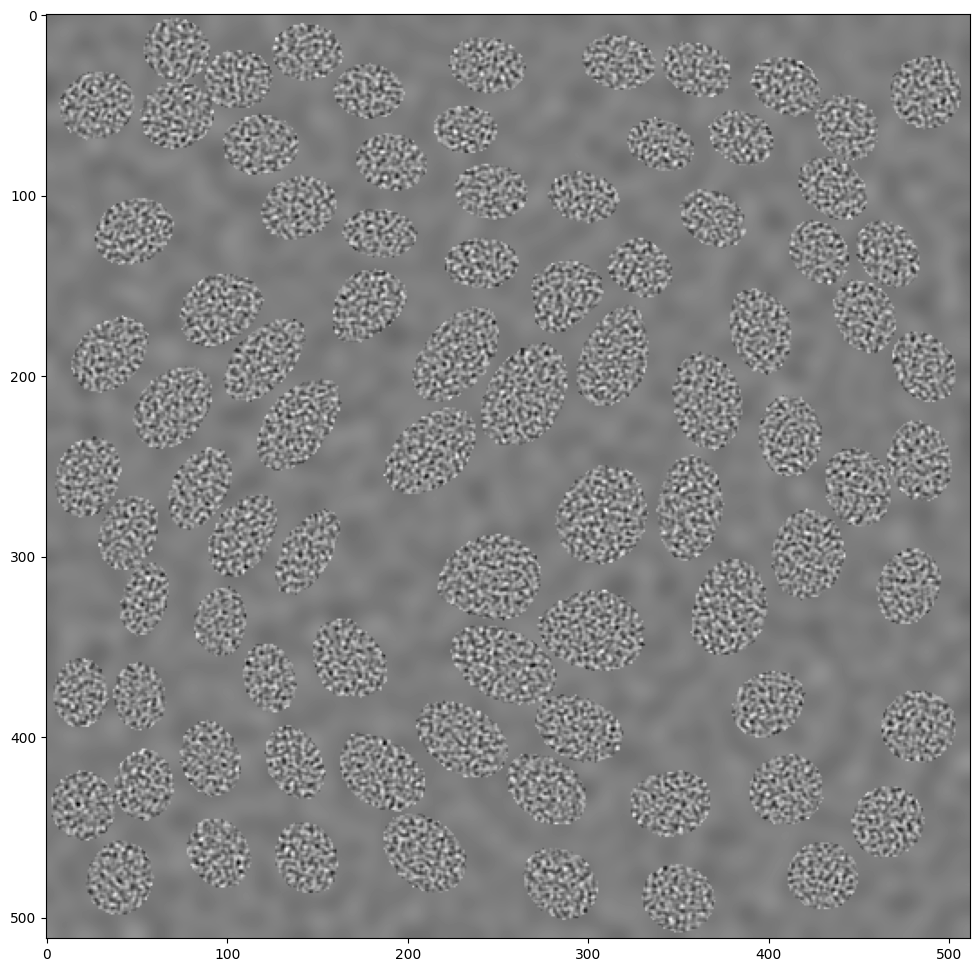

In [7]:
# Create noisy cells
noise_label = np.random.normal(0, 10, image_size)
dog_label = difference_of_gaussians(noise_label, sigma_cell)

# Create noisy background
noise_back = np.random.normal(0, 10, image_size)
dog_back = difference_of_gaussians(noise_back, sigma_back)

# Combine masks into a single image
image = dog_label * new_label
image += (dog_back - diff_mean) * (1 - new_label)

# Show image larger than default
plt.figure(figsize=(12,12))
plt.imshow(image, cmap='gray', interpolation=None)
plt.show()


### 4. Generating datasets

We can try generating an example dataset consisting of a single training image and a single testing image. 

In [8]:
image_size = (512, 512)
density = 0.4
avg_radius = 20
diff_mean = 0.3
sigma_cell = 1
sigma_back = 6
magnitude = 20
grid_size = 4
no_overlap = True
num_images = 1

generate_dataset(image_size, density, avg_radius, diff_mean, sigma_cell, sigma_back, magnitude, grid_size, num_images, no_overlap)

Initialised with 1 image(s) found.
Output directory set to temp/output.

Processing <PIL.Image.Image image mode=RGBA size=512x512 at 0x164AD07F0>: 100%|██████████| 1/1 [00:00<00:00,  9.81 Samples/s]


Initialised with 1 image(s) found.
Output directory set to temp/output.

Processing <PIL.Image.Image image mode=RGBA size=512x512 at 0x164B90640>: 100%|██████████| 1/1 [00:00<00:00,  9.70 Samples/s]


### 5. Sanity check

We check that the generated labels has indeed values {0, 1}. 

Unique values in label:  [0 1]


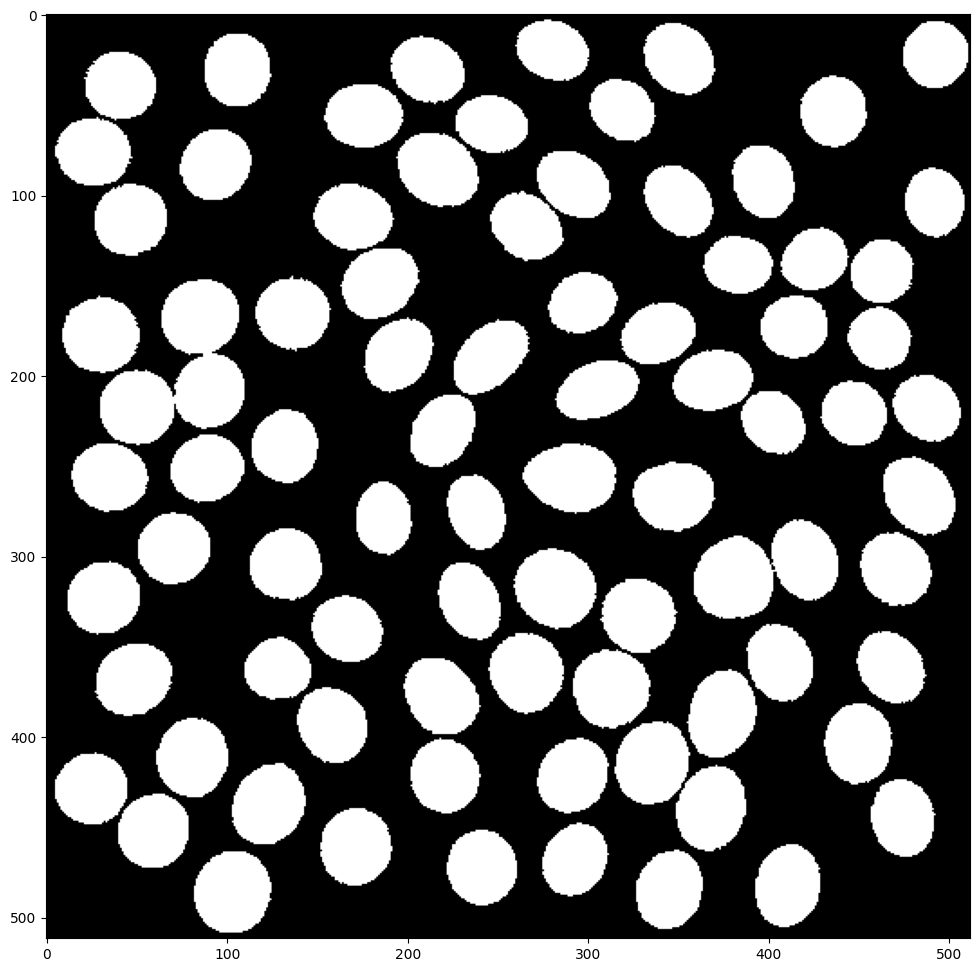

In [10]:
dataset_path = f'generated_datasets/dataset_rad{avg_radius}_sig{sigma_back}_{sigma_cell}'
gen_label_path = os.path.join(dataset_path, 'test', 'labels', '001.tif')
gen_label = Image.open(gen_label_path)
print('Unique values in label: ', np.unique(gen_label))
plt.figure(figsize=(12,12))
plt.imshow(gen_label, cmap='gray', interpolation=None)
plt.show()

We also check that the generated image ranges in values [0, 255]. 

Unique values in image:  [  0   6  20  21  23  25  26  27  28  29  30  31  32  33  34  35  36  37
  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54  55
  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72  73
  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91
  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108 109
 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127
 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145
 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163
 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181
 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199
 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217
 218 219 220 221 222 223 224 225 226 227 228 229 231 236 237 243 246 254]


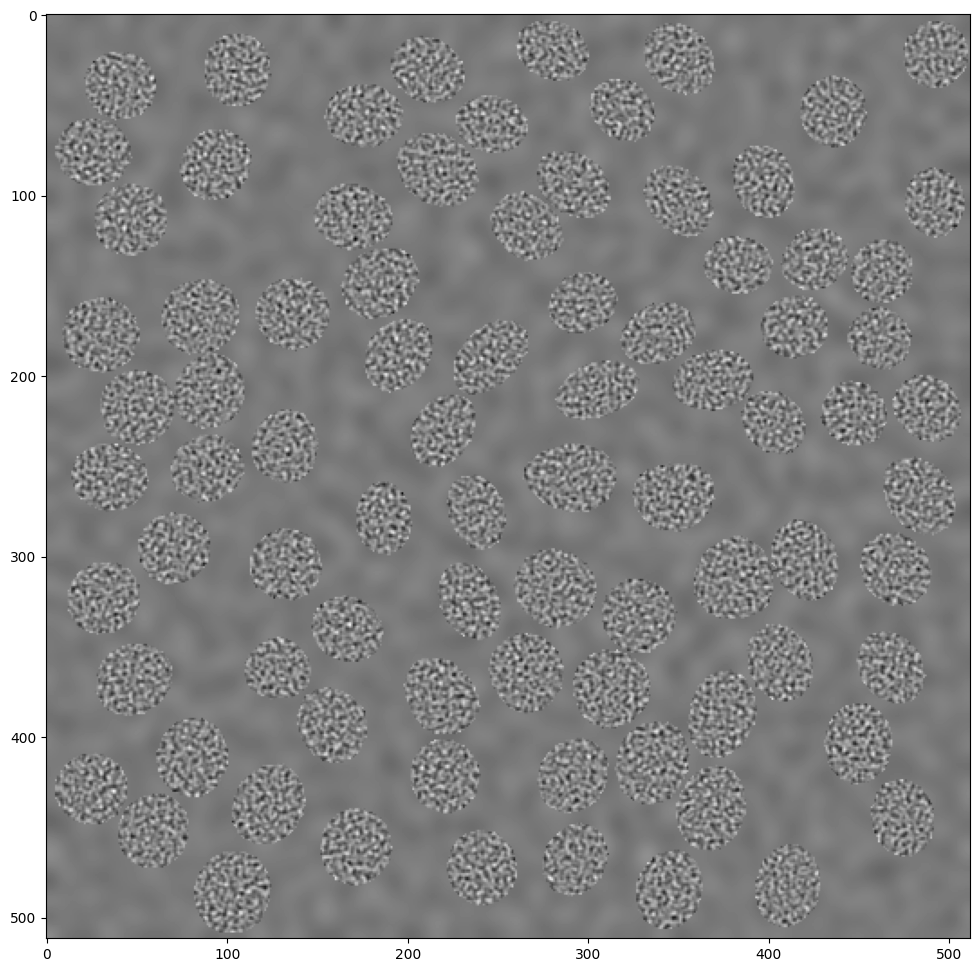

In [11]:
gen_image_path = os.path.join(dataset_path, 'test', 'images', '001.tif')
gen_image = Image.open(gen_image_path)
print('Unique values in image: ', np.unique(gen_image))
plt.figure(figsize=(12,12))
plt.imshow(gen_image, cmap='gray', interpolation=None)
plt.show()